<a href="https://colab.research.google.com/github/daniyalaamir110/ML_course/blob/main/Projects/1_linear_regression_analysis_on_advertising_data_using_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Analysis on Advertising Data Using Gradient Descent

## Overview

In this notebook, we'll perform a linear regression analysis on advertising data to explore the relationships between different advertising channels and their impact on sales. The primary goal is to build a predictive model that can estimate sales based on the advertising spending in various mediums.

## Dataset

We'll be using the "Advertising Dataset," which can be found on Kaggle. The dataset provides information about advertising spending on TV, radio, and newspapers, along with corresponding sales figures. This dataset is valuable for understanding how different advertising channels contribute to sales.

Dataset Link: [Advertising Dataset on Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset)

## Sections

1. **Initial Setup:** Load the dataset, and the required libraries.

2. **Data Exploration:** Explore the characteristics of the dataset, visualize the relationships between variables, and gain insights into the distribution of features.

3. **Feature Engineering:** Prepare the data for linear regression by scaling, handling categorical variables, and potentially creating polynomial features.

4. **Model Training:** Implement linear regression using the gradient descent algorithm. Train the model on the advertising dataset and interpret the impact of different advertising channels on sales.

5. **Model Evaluation:** Analyze the accuracy of model with training and test data. Also make prediction on some random data.

6. **Conclusion:** Summarize the findings, discuss potential improvements, and highlight key takeaways.


# Initial Setup

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

## Loading the Dataset

Before we start our analysis, make sure you have downloaded the dataset and uploaded it to this Colab notebook. You can find the "Advertising Dataset" on Kaggle: [Advertising Dataset on Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset).

Once you have uploaded the dataset, we can proceed to load it into our notebook using the following code:

```df = pd.read_csv("path/to/your/uploaded/file.csv")```

In [2]:
df = pd.read_csv("/content/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Exploration

## Correlation Heatmap

To better understand the relationships between features, I utilized a correlation heatmap. The heatmap revealed that the features in our dataset exhibit low mutual correlation. Interestingly, the "TV" feature stood out with the highest impact on sales, showcasing a strong correlation.


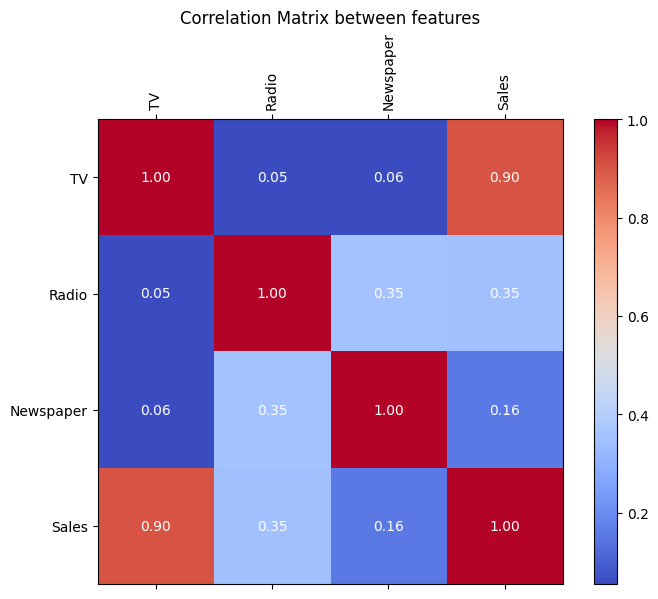

In [3]:
def plot_corr(df):
  plt.figure(figsize=(8, 6))
  corr = df.corr()
  plt.matshow(corr, cmap="coolwarm", fignum=1)
  plt.xticks(range(len(df.columns)), df.columns, rotation=90)
  plt.yticks(range(len(df.columns)), df.columns)
  for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        text = "{:.2f}".format(corr.iloc[i, j])
        plt.text(j, i, text, ha="center", va="center", c="w")
  plt.title("Correlation Matrix between features")
  plt.colorbar()
  plt.show()

plot_corr(df)

The heatmap visually represents the correlation matrix, providing insights into how each feature correlates with others and, more importantly, with the target variable "Sales."

## Scatter Plots
To further explore the relationship between individual features and sales, I created scatter plots for each feature. Notably, the "TV" feature displayed a relatively low bias and a discernible linear pattern. Although alternative transformations, such as using the square root feature, could potentially improve accuracy to around 93%, for this analysis, I opted to stick with purely linear features as they also yield satisfactory results.

In [4]:
def plot_scatter(df, output_col, title="Training Data"):
  X = df.drop(output_col, axis=1)
  y = df[output_col]
  X_features = X.columns
  n = len(X_features)
  fig, ax = plt.subplots(1, n, figsize=(4 * n, 4), sharey=True)
  for i in range(len(ax)):
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X[X_features[i]], y, marker="x", color="red", label="Training data")
  ax[0].set_ylabel(output_col)
  ax[0].legend()
  plt.suptitle(title)
  fig.show()

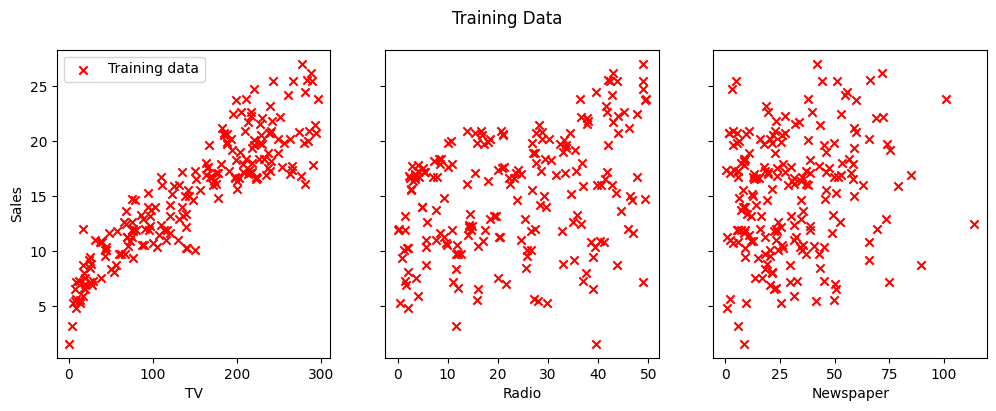

In [5]:
plot_scatter(df, "Sales")

These scatter plots offer a visual representation of the relationships, helping us observe trends and patterns in the data. Despite the simplicity of linear features, they provide a reasonable representation of the underlying relationships for our analysis.

## Feature Analysis

To gain insights into the distribution and characteristics of each feature, I computed various statistical measures including mean, median, quartiles, standard deviation, minimum, and maximum values.


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


The table above provides a summary of the statistical measures for each feature, offering a snapshot of the central tendency, dispersion, and overall distribution of the data. Upon inspecting the statistical measures, a notable observation is the significant difference in the ranges of the features. Features like "TV," "Radio," and "Newspaper" have different scales, which can impact the performance of certain machine learning algorithms. To address this, we'll apply feature scaling techniques to normalize the features and ensure a more consistent impact on the model.

# Feature Engineering
Feature scaling is crucial when features have different scales, preventing certain features from dominating the learning process. Common techniques include Standard Scaling (Z-score normalization) and Min-Max Scaling. We will be using Z-score normalization.

In [7]:
def get_scaled_data(df, output_col, output_path="scaler.joblib"):
  scaler = StandardScaler()
  X = df.drop(output_col, axis=1)
  X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
  joblib.dump(scaler, output_path)
  scaled_df = X_scaled
  scaled_df[output_col] = df[output_col]
  return scaled_df

df_scaled = get_scaled_data(df, "Sales")

df_scaled

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,12.0
3,0.052050,1.217855,1.286405,16.5
4,0.394182,-0.841614,1.281802,17.9
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,7.6
196,-0.617035,-1.240003,-1.033598,14.0
197,0.349810,-0.942899,-1.111852,14.8
198,1.594565,1.265121,1.640850,25.5


By standardizing the features, we ensure that each feature contributes proportionately to the learning process, leading to a more stable and effective model.

This sets the stage for the subsequent steps in our analysis, ensuring that our features are appropriately scaled for the linear regression model.

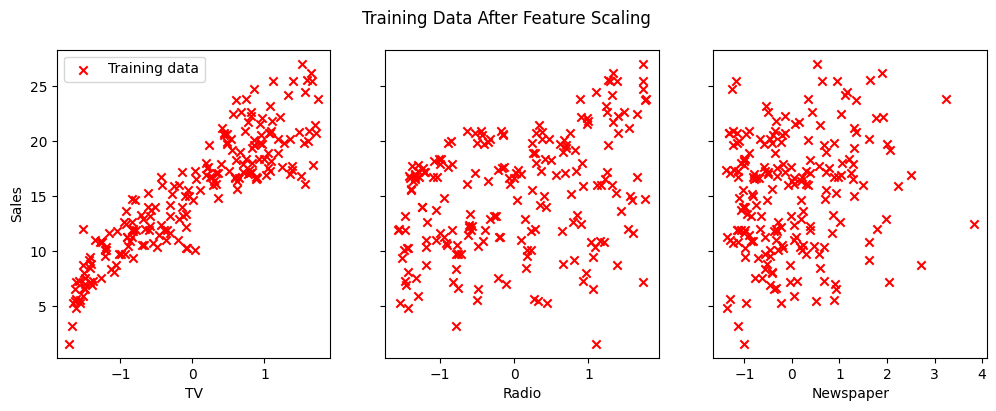

In [8]:
plot_scatter(df_scaled, "Sales", "Training Data After Feature Scaling")

This scatter plots provides a visual representation of the relationships between each scaled feature and sales. After feature scaling, we can observe how the scaled features maintain their patterns while being on a consistent scale. This ensures that the linear regression model is less sensitive to differences in feature magnitudes, contributing to a more reliable and interpretable analysis.

The visualizations complement our statistical analysis and set the stage for the subsequent steps in our linear regression analysis.

In [9]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,1.221245e-16,1.002509,-1.708823,-0.848530,0.031615,0.838195,1.744029
Radio,200.0,-4.529710e-16,1.002509,-1.570868,-0.897321,-0.024579,0.895430,1.778300
Newspaper,200.0,2.220446e-16,1.002509,-1.392646,-0.819550,-0.221137,0.669579,3.841171
Sales,200.0,1.513050e+01,5.283892,1.600000,11.000000,16.000000,19.050000,27.000000


# Model Training

## Data Splitting

Before training our linear regression model, we need to split our dataset into training and testing sets. This allows us to evaluate the model's performance on unseen data.


In [10]:
X = df_scaled.drop("Sales", axis=1)
y = df_scaled["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Generation
Let's proceed with generating our linear regression model using the training data. We'll be using Stochastic Gradient Descent Regressor as our learning model.

In [11]:
sgdr = SGDRegressor()
sgdr = sgdr.fit(X_train, y_train)

## Interpretation of Parameters
Now, let's interpret the parameters (coefficients) of our linear regression model. The coefficients represent the impact of each feature on the target variable.

In [12]:
print("Intercept =", sgdr.intercept_[0])
print("Weights:\n")

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': sgdr.coef_})
coefficients

Intercept = 15.1935449811542
Weights:



,Feature,Coefficient
0,TV,4.669554
1,Radio,1.486879
2,Newspaper,0.101162


The impact of "TV" was high by observation, and it turned out to have the highest weightage in determining the net sales

# Model Evaluation

## Model Accuracy

Let's start by evaluating the accuracy of our linear regression model on the training and testing set.


In [13]:
train_score = sgdr.score(X_train, y_train)
test_score = sgdr.score(X_test, y_test)

print("Accuracy with Training data =", train_score)
print("Accuracy with Testing data =", test_score)

Accuracy with Training data = 0.9001288122848745
Accuracy with Testing data = 0.9060373388903333


It turns out that model accuracy is about 90% on both sets.

In [14]:
def predict(X, X_features, scaler_path="scaler.joblib"):
  scaler = joblib.load('scaler.joblib')
  X_scaled = scaler.transform(pd.DataFrame(X, columns=X_features))
  predictions = sgdr.predict(pd.DataFrame(X_scaled, columns=X_features))
  return predictions

## Predictions on Random Data
To gain a deeper understanding of how our model performs on new, random data, let's generate sales using our model.

In [15]:
X_pred = np.array([[200, 50, 20], [250, 60, 25], [40, 30, 30]], X.columns)
y_pred = predict(X_pred, X.columns)

df_pred = pd.DataFrame(X_pred, columns=X.columns)
df_pred["Sales"] = y_pred

df_pred

,TV,Radio,Newspaper,Sales
0,200,50,20,20.716227
1,250,60,25,24.469795
2,40,30,30,10.030677


The table above shows predictions on a subset of random data, allowing us to observe how the model generalizes to new inputs.

# Conclusion

## Summary of Findings

In this linear regression analysis on advertising data, we explored the relationships between different advertising channels and their impact on sales. Here are the key findings:

- The correlation heatmap revealed low mutual correlation between features, with "TV" displaying the highest impact on sales.
- Scatter plots illustrated that the "TV" feature exhibited a relatively low bias and a discernible linear pattern.

## Model Accuracy and Predictions

Evaluating the model on the testing set, we utilized accuracy to assess its performance. The accuracy score suggests that our linear regression model predicts well, providing a reliable representation of the relationships within the dataset.

Additionally, predictions on random data showcased the model's ability to generalize to new inputs.

## Potential Improvements

While our model performs well, there are opportunities for improvement:

1. **Regularization:** Implementing regularization techniques (e.g., Lasso or Ridge regression) could help prevent overfitting and enhance model generalization.

2. **Polynomial Features:** Introducing polynomial features may capture more complex relationships, potentially increasing model accuracy.

## Key Takeaways

- The "TV" advertising channel has a significant impact on sales.
- Feature scaling was crucial for ensuring consistent model performance across different feature magnitudes.
- There is room for improvement through advanced techniques like regularization and polynomial features.

## Next Steps

As we conclude this analysis, consider experimenting with the suggested improvements to further refine the model's accuracy. Regularization and polynomial features can offer valuable insights into the underlying patterns within the data.
